In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
class Plane:
    def __init__(self,_id,_current_pos,_current_vel,_pos_array,_vel_array):
        self.id = _id #Unique id of plane
        self.pos_current = _current_pos #Pos at current time
        self.vel_current = _current_vel #Vel at current time
        self.pos_array = _pos_array #Array of position over time
        self.vel_array = _vel_array #Array of velocity over time

    def __str__(self):
        return "ID: {id}, Current_pos: {c_pos}, Current_vel: {c_vel}".format(id = self.id, c_pos = self.pos_current, c_vel = self.vel_current)

In [86]:
def create_n_planes(n_planes,max_pos,max_vel,num_time_steps):
    # n_planes controls how many planes are created
    # max_pos is used as size of the grid planes put randomly in (just temp)
    # max_vel scales the maximum velocity of the planes

    plane_list = []
    for id in range(n_planes):
        # initial_pos = np.random.rand(3) * max_pos
        # initial_vel = np.random.rand(3) * max_vel

        pos_array = np.zeros((num_time_steps,3))
        vel_array = np.zeros((num_time_steps,3))

        pos_array[0,:] = np.random.rand(3) * max_pos
        vel_array[0,:] = np.random.rand(3) * max_vel

        plane_list.append(Plane(id, #Unique id
                                pos_array[0,:], #Inital pos
                                vel_array[0,:], #Initial vel
                                pos_array, #Pos array
                                vel_array)) #Vel array
    
    return plane_list

In [87]:
#Define time setup
max_t = 10
delta_t = 0.5
num_t_steps = int(max_t / delta_t)

#Define variables about planes
num_planes = 4
grid_size = 10 #10x10 grid
max_plane_vel = 1

In [88]:
#Create planes
planes = create_n_planes(num_planes,grid_size,max_plane_vel,num_t_steps)

In [89]:
for timestep in range(num_t_steps-1):
    for plane in planes:
        #Have put extra variables in to make it clearer
        pos = plane.pos_array[timestep,:]
        vel = plane.vel_array[timestep,:]

        new_pos = pos + vel * delta_t
        new_vel = vel

        plane.pos_array[timestep+1,:] = new_pos
        plane.vel_array[timestep+1,:] = new_vel


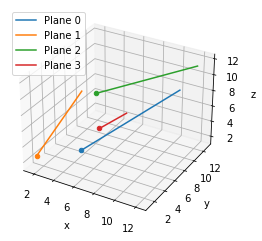

In [91]:
ax = plt.figure().add_subplot(projection='3d')
for plane in planes:
    pos = plane.pos_array
    ax.plot(pos[:,0],pos[:,1],pos[:,2],label="Plane {id}".format(id = plane.id))
    ax.scatter(pos[0,0],pos[0,1],pos[0,2])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.legend()
plt.show()